# loan prediction 

In [10]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [11]:
df=pd.read_csv("train.csv")

In [12]:
test=pd.read_csv("train.csv")

In [13]:
df.head(10)

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   
6  LP001013   Male     Yes          0  Not Graduate            No   
7  LP001014   Male     Yes         3+      Graduate            No   
8  LP001018   Male     Yes          2      Graduate            No   
9  LP001020   Male     Yes          1      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   
6             2333             1516.0        95.0             360.0   
7             3036             2504.0       158.0             360.0   
8             4006             1526.0       168.0             360.0   
9            12841            10968.0       349.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y  
5             1.0         Urban           Y  
6             1.0         Urban           Y  
7             0.0     Semiurban           N  
8             1.0         Urban           Y  
9             1.0     Semiurban           N

In [14]:
#storing all observation on my text csv
df_length =len(df)

In [15]:
#storing all number of columns 
test_col = len(test.columns)

In [16]:
#understanding various aspects of the data.
df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [17]:
# getting unique values
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

# 1 First we understand Distribution of numerical value of Applicant income and loan amount

In [18]:
%matplotlib inline

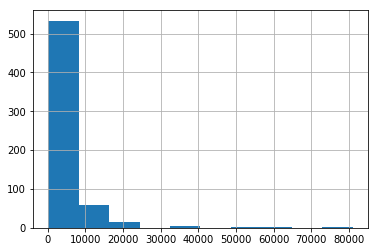

In [19]:
df['ApplicantIncome'].hist()

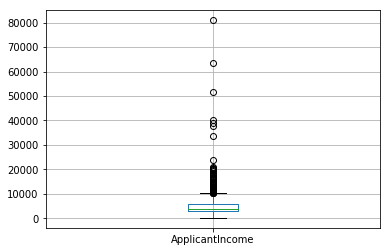

In [20]:
df.boxplot(column='ApplicantIncome')

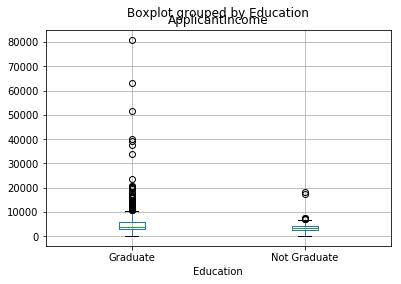

In [21]:
df.boxplot(column='ApplicantIncome', by = 'Education')

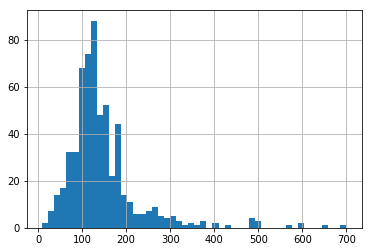

In [22]:
#Histogram of loan anmount variable
df['LoanAmount'].hist(bins=50)

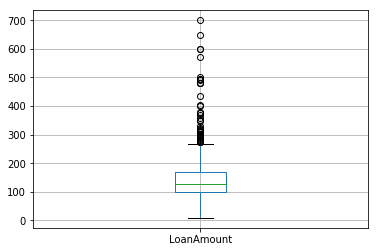

In [23]:
#Histogram of loan anmount variable of training data
df.boxplot(column='LoanAmount')

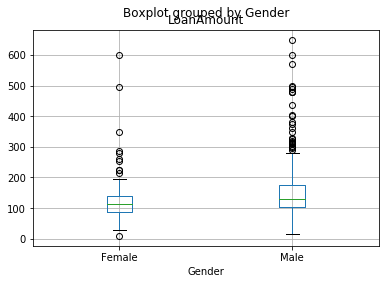

In [24]:
df.boxplot(column='LoanAmount', by = 'Gender')

#Understanding Distribution of Categorical Variables

In [31]:
# loan approval rate
loan_approval = df['Loan_Status'].value_counts()['Y']
print(loan_approval)
                                                 

422


In [32]:
# credit history
pd.crosstab(df ['Credit_History'], df ['Loan_Status'], margins=True)

Loan_Status       N    Y  All
Credit_History               
0.0              82    7   89
1.0              97  378  475
All             179  385  564

In [36]:
# Function to output percentage row wise in a cross table


# 4 Outliers of LoanAmount and Applicant Income

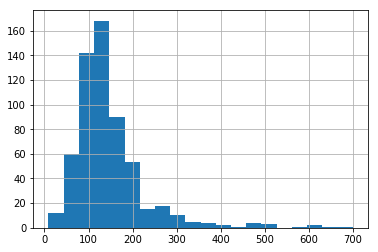

In [38]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['LoanAmount'].hist(bins=20)

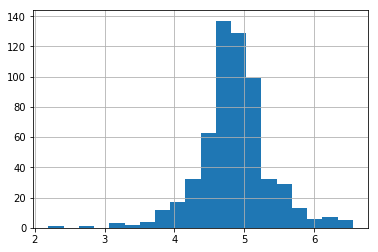

In [41]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

# Data Preparation for Model Building